In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
np.random.seed(sum(map(ord, "aesthetics")))

TypeError: Cannot cast array from dtype('O') to dtype('int64') according to the rule 'safe'

In [3]:
#Lets load data from train and test datasets
train_users = pd.read_csv('/home/adarshbolettin/Downloads/DMALab-master/Lab1/train_users_2.csv')
test_users = pd.read_csv('/home/adarshbolettin/Downloads/DMALab-master/Lab1/test_users.csv')

In [4]:
## How many users are in training set and test set
print("We have", train_users.shape[0], "users in the training set and", 
      test_users.shape[0], "in the test set.")
print("In total we have", train_users.shape[0] + test_users.shape[0], "users.")

We have 213451 users in the training set and 62096 in the test set.
In total we have 275547 users.


In [5]:
# Merge train and test users
users = pd.concat((train_users, test_users), axis=0, ignore_index=True)

In [6]:


# Remove ID's since now we are not interested in making predictions
# As of nw don't delete
users.drop('id',axis=1, inplace=True)

users.head()



,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,basic,20091208061105


In [46]:
users.gender.replace('-unknown-', np.nan, inplace=True)

In [41]:
users['gender']

0            NaN
1           MALE
2         FEMALE
3         FEMALE
4            NaN
5            NaN
6         FEMALE
7         FEMALE
8         FEMALE
9            NaN
10        FEMALE
11        FEMALE
12           NaN
13        FEMALE
14        FEMALE
15        FEMALE
16           NaN
17           NaN
18           NaN
19        FEMALE
20           NaN
21          MALE
22           NaN
23           NaN
24        FEMALE
25        FEMALE
26           NaN
27        FEMALE
28           NaN
29           NaN
           ...  
275517       NaN
275518    FEMALE
275519       NaN
275520    FEMALE
275521    FEMALE
275522       NaN
275523       NaN
275524       NaN
275525       NaN
275526    FEMALE
275527      MALE
275528       NaN
275529       NaN
275530      MALE
275531       NaN
275532    FEMALE
275533       NaN
275534      MALE
275535      MALE
275536    FEMALE
275537       NaN
275538      MALE
275539       NaN
275540      MALE
275541       NaN
275542       NaN
275543       NaN
275544       N

In [8]:
## How much data we are missing?
## Compute NaN percentage of each feature.
users_nan = (users.isnull().sum() / users.shape[0]) * 100
users_nan[users_nan > 0]

age                        42.412365
country_destination        22.535538
date_first_booking         67.733998
first_affiliate_tracked     2.208335
gender                     46.990169
dtype: float64

In [9]:
## age
users.age.describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

In [10]:


print(sum(users.age > 122))
print(sum(users.age < 18))



830
188


In [11]:
users[users.age > 122]['age'].describe()
## seems cause due to appearance of 2014 - wrong input

count     830.000000
mean     2002.620482
std        94.201344
min       132.000000
25%      2014.000000
50%      2014.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

In [12]:
users[users.age < 18]['age'].describe()

count    188.000000
mean      12.718085
std        5.764569
min        1.000000
25%        5.000000
50%       16.000000
75%       17.000000
max       17.000000
Name: age, dtype: float64

In [13]:


users.loc[users.age > 95, 'age'] = np.nan
users.loc[users.age < 13, 'age'] = np.nan
users.head()



,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,NaN,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,NaN,en,Web,0,basic,20091208061105


In [14]:
categorical_features = [
    'affiliate_channel',
    'affiliate_provider',
    'country_destination',
    'first_affiliate_tracked',
    'first_browser',
    'first_device_type',
    'gender',
    'language',
    'signup_app',
    'signup_method'
]

for categorical_feature in categorical_features:
    users[categorical_feature] = users[categorical_feature].astype('category')

In [15]:
users['date_account_created'] = pd.to_datetime(users['date_account_created'])
users['date_first_booking'] = pd.to_datetime(users['date_first_booking'])
users['date_first_active'] = pd.to_datetime((users.timestamp_first_active // 1000000), format='%Y%m%d')

In [16]:


users



,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active,date_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaT,untracked,Chrome,Mac Desktop,NaN,en,Web,0,facebook,20090319043255,2009-03-19
1,seo,google,38.0,NDF,2011-05-25,NaT,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809,2009-05-23
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247,2009-06-09
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,20091031060129,2009-10-31
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,NaN,en,Web,0,basic,20091208061105,2009-12-08
5,other,other,NaN,US,2010-01-01,2010-01-02,omg,Chrome,Mac Desktop,NaN,en,Web,0,basic,20100101215619,2010-01-01
6,other,craigslist,46.0,US,2010-01-02,2010-01-05,untracked,Safari,Mac Desktop,FEMALE,en,Web,0,basic,20100102012558,2010-01-02
7,direct,direct,47.0,US,2010-01-03,2010-01-13,omg,Safari,Mac Desktop,FEMALE,en,Web,0,basic,20100103191905,2010-01-03
8,other,craigslist,50.0,US,2010-01-04,2010-07-29,untracked,Safari,Mac Desktop,FEMALE,en,Web,0,basic,20100104004211,2010-01-04
9,other,craigslist,46.0,US,2010-01-04,2010-01-04,omg,Firefox,Mac Desktop,NaN,en,Web,0,basic,20100104023758,2010-01-04


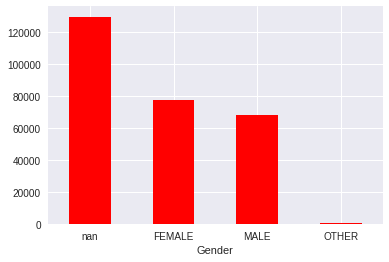

In [17]:
users.gender.value_counts(dropna=False).plot(kind='bar', color='red', rot=0)
plt.xlabel('Gender')
sns.despine()

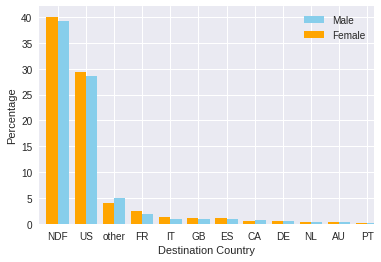

In [18]:
women = sum(users['gender'] == 'FEMALE')
men = sum(users['gender'] == 'MALE')

female_destinations = users.loc[users['gender'] == 'FEMALE', 'country_destination'].value_counts() / women * 100
male_destinations = users.loc[users['gender'] == 'MALE', 'country_destination'].value_counts() / men * 100

# Bar width
width = 0.4

male_destinations.plot(kind='bar', width=width, color='skyblue', position=0, label='Male', rot=0)
female_destinations.plot(kind='bar', width=width, color='orange', position=1, label='Female', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

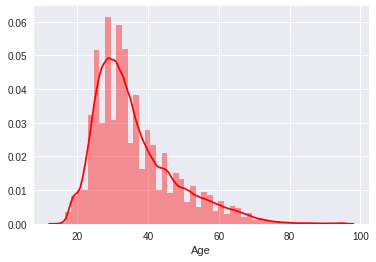

In [19]:
sns.distplot(users.age.dropna(), color='red')
plt.xlabel('Age')
sns.despine()


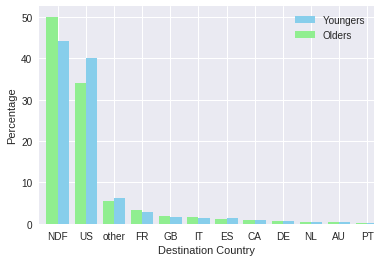

In [20]:
age = 45

younger = sum(users.loc[users['age'] < age, 'country_destination'].value_counts())
older = sum(users.loc[users['age'] > age, 'country_destination'].value_counts())

younger_destinations = users.loc[users['age'] < age, 'country_destination'].value_counts() / younger * 100
older_destinations = users.loc[users['age'] > age, 'country_destination'].value_counts() / older * 100

younger_destinations.plot(kind='bar', width=width, color='skyblue', position=0, label='Youngers', rot=0)
older_destinations.plot(kind='bar', width=width, color='lightgreen', position=1, label='Olders', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

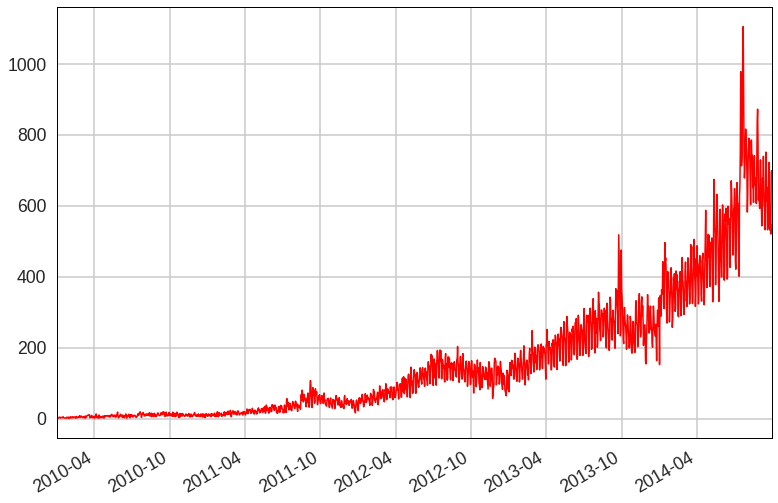

In [21]:
sns.set_style("whitegrid", {'axes.edgecolor': '0'})
sns.set_context("poster", font_scale=1.1)
users.date_account_created.value_counts().plot(kind='line',linewidth=1.5, color='red')

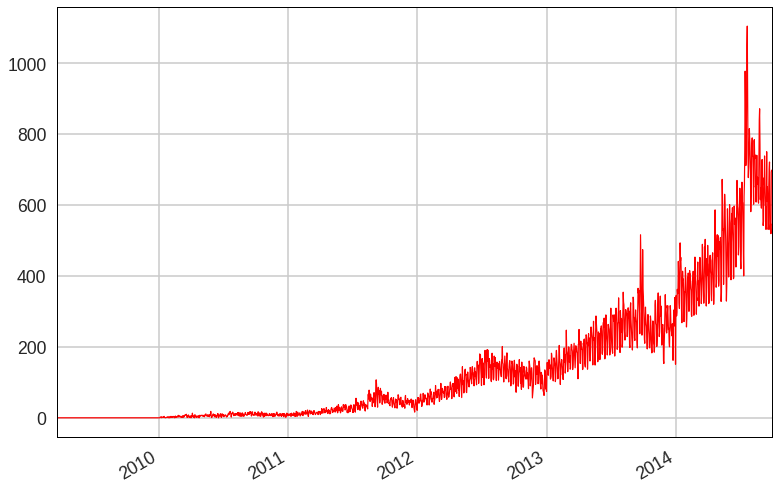

In [22]:
users.date_first_active.value_counts().plot(kind='line', linewidth=1.2, color='red')

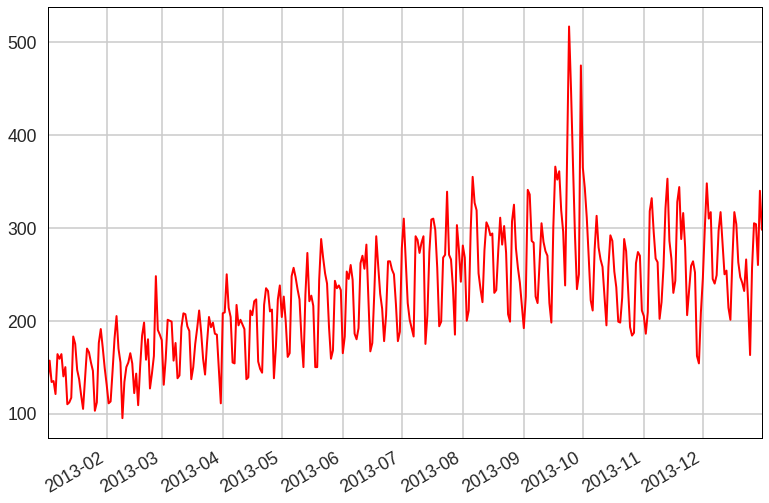

In [23]:
## lets select 2013 year

users_2013 = users[users['date_first_active'] > pd.to_datetime(20130101, format='%Y%m%d')]
users_2013 = users_2013[users_2013['date_first_active'] < pd.to_datetime(20140101, format='%Y%m%d')]
users_2013.date_first_active.value_counts().plot(kind='line', linewidth=2, color='red')
plt.show()

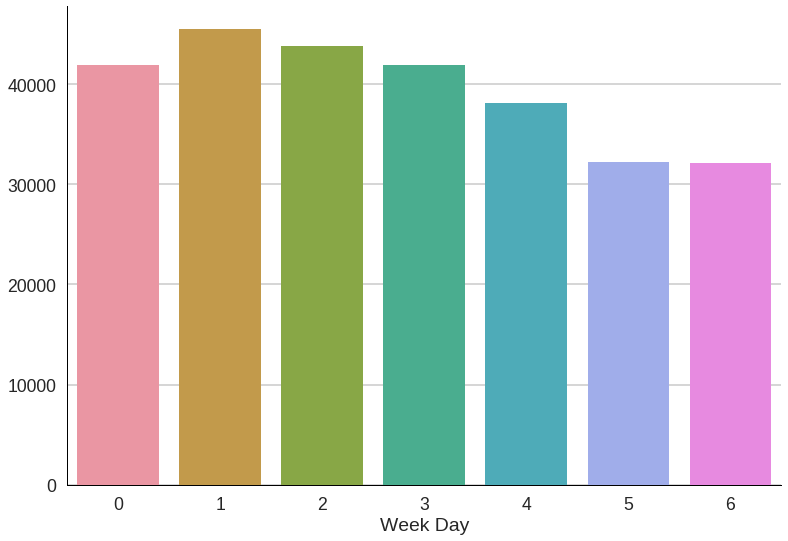

In [24]:
weekdays = []
for date in users.date_account_created:
    weekdays.append(date.weekday())
weekdays = pd.Series(weekdays)

#////////////////

sns.barplot(x = weekdays.value_counts().index, y=weekdays.value_counts().values, order=range(0,7))
plt.xlabel('Week Day')
sns.despine()



In [25]:


g=users[['date_account_created','date_first_active','country_destination']]
g.head()



,date_account_created,date_first_active,country_destination
0,2010-06-28,2009-03-19,NDF
1,2011-05-25,2009-05-23,NDF
2,2010-09-28,2009-06-09,US
3,2011-12-05,2009-10-31,other
4,2010-09-14,2009-12-08,US


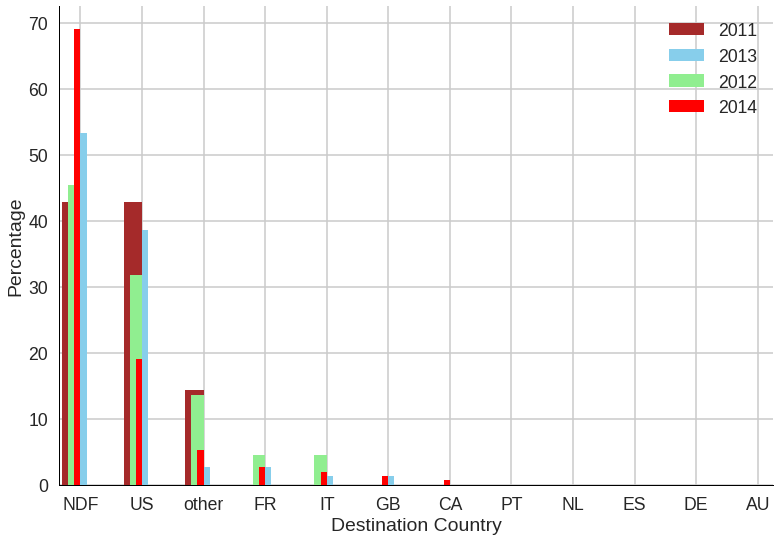

75
152


In [26]:
#graph of date_first_active in years 2011,2012,2013,2014 Vs country_destination
users_2013 = sum(users.loc[users['date_first_active'] == pd.to_datetime(2013, format='%Y'),'country_destination'].value_counts())
users_2014 = sum(users.loc[users['date_first_active'] == pd.to_datetime(2014, format='%Y'),'country_destination'].value_counts())
users_2012 = sum(users.loc[users['date_first_active'] == pd.to_datetime(2012, format='%Y'),'country_destination'].value_counts())
users_2011 = sum(users.loc[users['date_first_active'] == pd.to_datetime(2011, format='%Y'),'country_destination'].value_counts())


u2013 = users.loc[users['date_first_active'] == pd.to_datetime(2013, format='%Y'), 'country_destination'].value_counts() / users_2013 * 100
u2014= users.loc[users['date_first_active'] == pd.to_datetime(2014, format='%Y'), 'country_destination'].value_counts() /users_2014 * 100
u2012= users.loc[users['date_first_active'] == pd.to_datetime(2012, format='%Y'), 'country_destination'].value_counts() /users_2012 * 100
u2011= users.loc[users['date_first_active'] == pd.to_datetime(2011, format='%Y'), 'country_destination'].value_counts() /users_2011 * 100

u2011.plot(kind='bar', width=0.3, color='brown', position=1, label='2011', rot=0)

u2013.plot(kind='bar', width=0.1, color='skyblue', position=0, label='2013', rot=0)
u2012.plot(kind='bar', width=0.2, color='lightgreen', position=1, label='2012', rot=0)
u2014.plot(kind='bar', width=0.1, color='red', position=1, label='2014', rot=0)


plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()
print(users_2013)
print(users_2014)

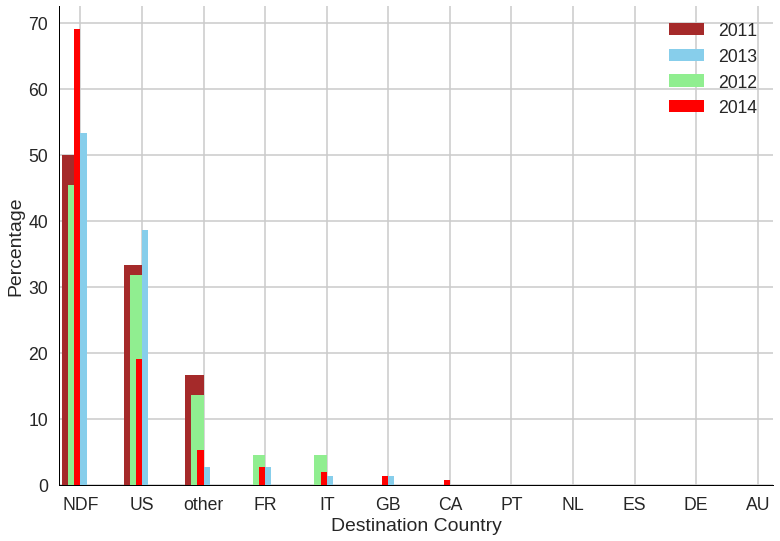

In [27]:
#graph of date_account_created in years 2011,2012,2013,2014 Vs country_destination

users_213 = sum(users.loc[users['date_account_created'] == pd.to_datetime(2013, format='%Y'),'country_destination'].value_counts())
users_214 = sum(users.loc[users['date_account_created'] == pd.to_datetime(2014, format='%Y'),'country_destination'].value_counts())
users_212 = sum(users.loc[users['date_account_created'] == pd.to_datetime(2012, format='%Y'),'country_destination'].value_counts())
users_211 = sum(users.loc[users['date_account_created'] == pd.to_datetime(2011, format='%Y'),'country_destination'].value_counts())


u213 = users.loc[users['date_account_created'] == pd.to_datetime(2013, format='%Y'), 'country_destination'].value_counts() / users_213 * 100
u214= users.loc[users['date_account_created'] == pd.to_datetime(2014, format='%Y'), 'country_destination'].value_counts() /users_214 * 100
u212= users.loc[users['date_account_created'] == pd.to_datetime(2012, format='%Y'), 'country_destination'].value_counts() /users_212 * 100
u211= users.loc[users['date_account_created'] == pd.to_datetime(2011, format='%Y'), 'country_destination'].value_counts() /users_211 * 100

u211.plot(kind='bar', width=0.3, color='brown', position=1, label='2011', rot=0)

u213.plot(kind='bar', width=0.1, color='skyblue', position=0, label='2013', rot=0)
u212.plot(kind='bar', width=0.2, color='lightgreen', position=1, label='2012', rot=0)
u214.plot(kind='bar', width=0.1, color='red', position=1, label='2014', rot=0)


plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

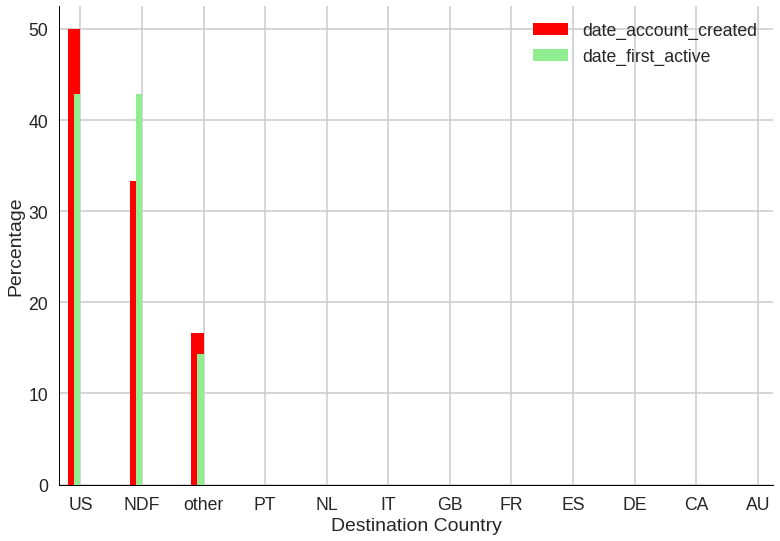

In [28]:
#graph of date_account_created and date_first_active in year 2011 Vs country_destination
users_211 = sum(users.loc[users['date_account_created'] == pd.to_datetime(2011, format='%Y'),'country_destination'].value_counts())
users_2011 = sum(users.loc[users['date_first_active'] == pd.to_datetime(2011, format='%Y'),'country_destination'].value_counts())

u211= users.loc[users['date_account_created'] == pd.to_datetime(2011, format='%Y'), 'country_destination'].value_counts() /users_211 * 100
u2011= users.loc[users['date_first_active'] == pd.to_datetime(2011, format='%Y'), 'country_destination'].value_counts() /users_2011 * 100

u211.plot(kind='bar', width=0.2, color='red', position=1, label='date_account_created', rot=0)
u2011.plot(kind='bar', width=0.1, color='lightgreen', position=1, label='date_first_active', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

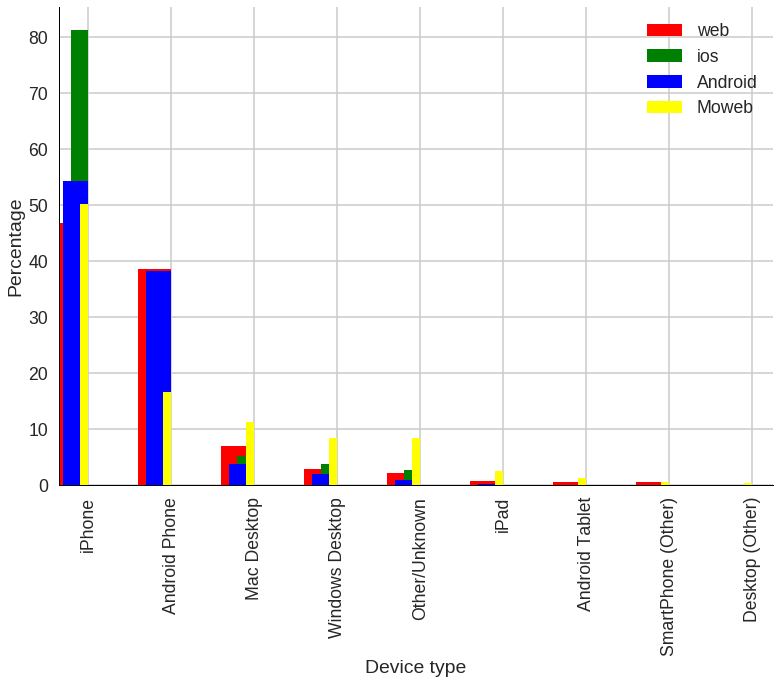

In [29]:
#graph of signup_app Vs device_type
web = sum(users.loc[users['signup_app'] =='Web','first_device_type'].value_counts())
andr= sum(users.loc[users['signup_app'] == 'Android','first_device_type'].value_counts())
ios = sum(users.loc[users['signup_app'] == 'iOS','first_device_type'].value_counts())
mweb = sum(users.loc[users['signup_app'] == 'Moweb','first_device_type'].value_counts())



s_web= users.loc[users['signup_app'] =='Web', 'first_device_type'].value_counts() /web * 100
s_andr= users.loc[users['signup_app'] =='Android', 'first_device_type'].value_counts() /andr * 100
s_ios= users.loc[users['signup_app'] =='iOS', 'first_device_type'].value_counts() /ios * 100
s_mweb= users.loc[users['signup_app'] =='Moweb', 'first_device_type'].value_counts() /mweb * 100


s_web.plot(kind='bar', width=0.4, color='red', position=1, label='web')
s_ios.plot(kind='bar', width=0.2, color='green', position=1, label='ios')
s_andr.plot(kind='bar', width=0.3, color='blue', position=1, label='Android')

s_mweb.plot(kind='bar', width=0.1, color='yellow', position=1, label='Moweb')

plt.legend()
plt.xlabel('Device type')
plt.ylabel('Percentage')

sns.despine()
plt.show()

In [30]:
df=users['age'].groupby([users['date_account_created'],users['country_destination']]).mean()
df.head()

date_account_created  country_destination
2010-01-01            US                      NaN
2010-01-02            US                     46.0
2010-01-03            US                     47.0
2010-01-04            US                     44.0
2010-01-05            FR                      NaN
Name: age, dtype: float64

In [31]:
users['age'].replace(np.NaN,-1)
users.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active,date_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaT,untracked,Chrome,Mac Desktop,NaN,en,Web,0,facebook,20090319043255,2009-03-19
1,seo,google,38.0,NDF,2011-05-25,NaT,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809,2009-05-23
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247,2009-06-09
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,20091031060129,2009-10-31
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,NaN,en,Web,0,basic,20091208061105,2009-12-08


In [33]:

# Other column missing value - Fill first_affiliate_tracked column
print("Filling first_affiliate_tracked column...")
users['first_affiliate_tracked'].fillna(-1, inplace=True)
print("Filling first_affiliate_tracked column...completed")

users.head()

Filling first_affiliate_tracked column...


ValueError: fill value must be in categories

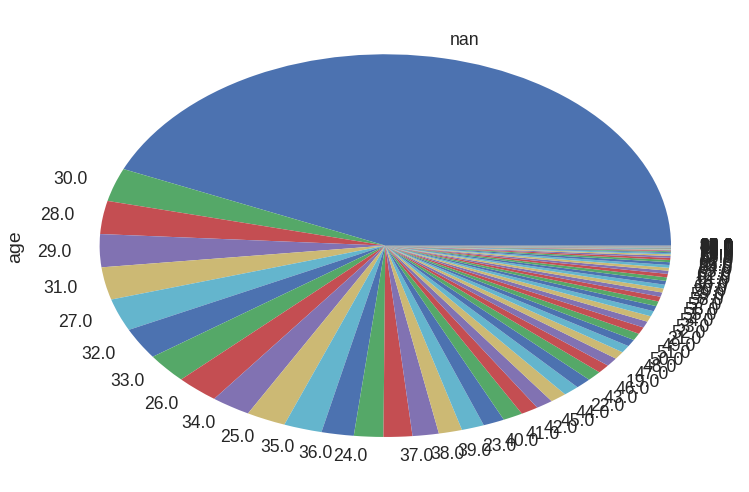

In [34]:
users.age.value_counts(dropna = False).plot(kind='pie')

In [42]:
users['country_destination'].replace(np.NaN,"NDF")
users['country_destination']

0           NDF
1           NDF
2            US
3         other
4            US
5            US
6            US
7            US
8            US
9            US
10           US
11          NDF
12           FR
13          NDF
14          NDF
15           CA
16          NDF
17           US
18          NDF
19           FR
20           US
21           US
22           US
23          NDF
24          NDF
25           FR
26          NDF
27           US
28           FR
29           US
          ...  
275517      NaN
275518      NaN
275519      NaN
275520      NaN
275521      NaN
275522      NaN
275523      NaN
275524      NaN
275525      NaN
275526      NaN
275527      NaN
275528      NaN
275529      NaN
275530      NaN
275531      NaN
275532      NaN
275533      NaN
275534      NaN
275535      NaN
275536      NaN
275537      NaN
275538      NaN
275539      NaN
275540      NaN
275541      NaN
275542      NaN
275543      NaN
275544      NaN
275545      NaN
275546      NaN
Name: country_destinatio

In [47]:
users.country_destination.replace('-nan', np.ndf, inplace=True)

AttributeError: module 'numpy' has no attribute 'ndf'

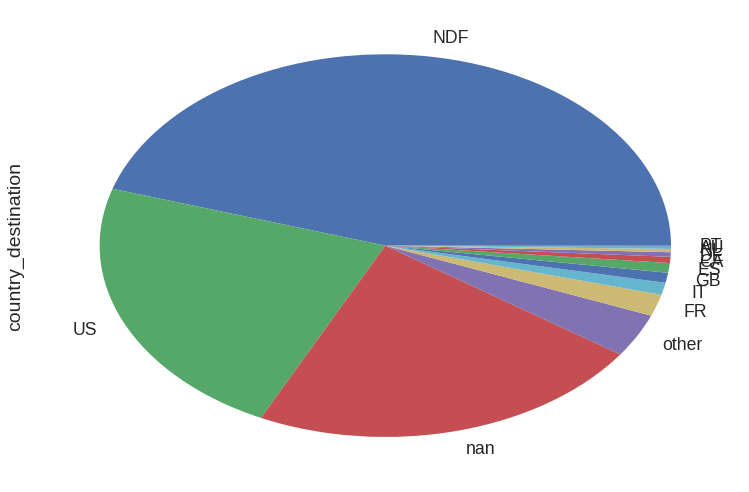

In [48]:


users.country_destination.value_counts(dropna = False).plot(kind='pie')



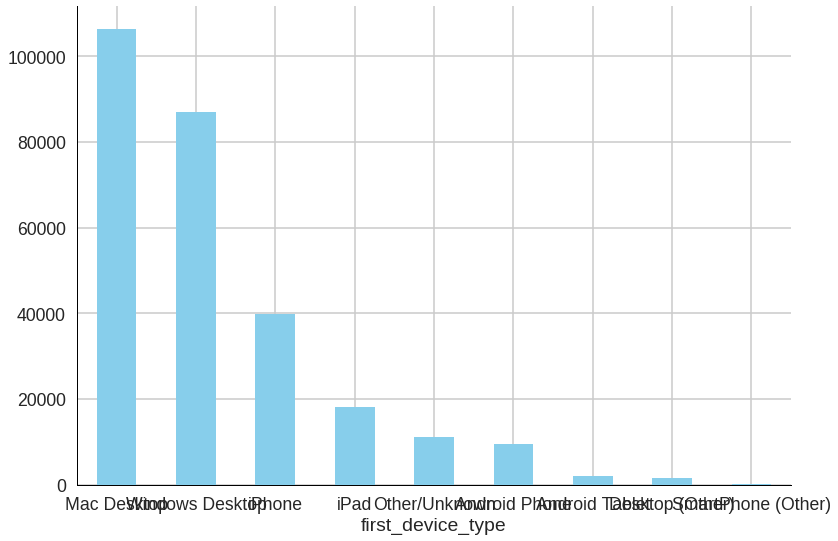

In [50]:
import seaborn as sns
users.first_device_type.value_counts(dropna=False).plot(kind='bar', color='skyblue', rot=0)
plt.xlabel('first_device_type')
sns.despine()

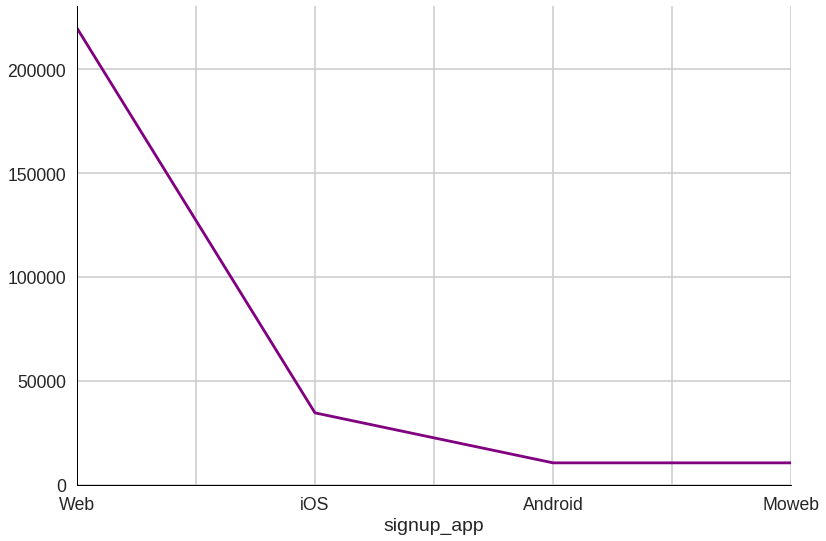

In [51]:
users.signup_app.value_counts(dropna=False).plot(kind='line', color='purple', rot=0)
plt.xlabel('signup_app')
sns.despine()

In [52]:
import numpy as np
col_values=users['gender'].values
users['gender']=np.where(users['gender']=="-unknown-",np.NaN,col_values)
users['gender'].fillna(-1,inplace=True)
users.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active,date_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaT,untracked,Chrome,Mac Desktop,-1,en,Web,0,facebook,20090319043255,2009-03-19
1,seo,google,38.0,NDF,2011-05-25,NaT,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809,2009-05-23
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247,2009-06-09
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,20091031060129,2009-10-31
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-1,en,Web,0,basic,20091208061105,2009-12-08


In [53]:
import numpy as np
col_values=users['country_destination'].values
users['country_destination']=np.where(users['country_destination']=="other",np.NaN,col_values)
users['country_destination'].fillna(-1,inplace=True)
users.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active,date_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaT,untracked,Chrome,Mac Desktop,-1,en,Web,0,facebook,20090319043255,2009-03-19
1,seo,google,38.0,NDF,2011-05-25,NaT,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809,2009-05-23
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247,2009-06-09
3,direct,direct,42.0,-1,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,20091031060129,2009-10-31
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-1,en,Web,0,basic,20091208061105,2009-12-08


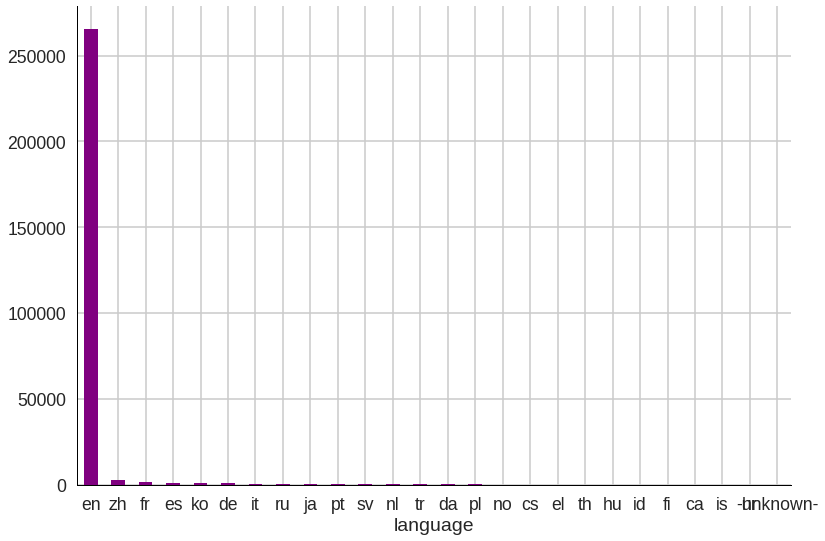

In [54]:
users.language.value_counts(dropna=False).plot(kind='bar', color='purple', rot=0)
plt.xlabel('language')
sns.despine()

In [55]:
import numpy as np
col_values=users['affiliate_channel'].values
users['affiliate_channel']=np.where(users['affiliate_channel']=="0",np.NaN,col_values)
users['affiliate_channel'].fillna(1,inplace=True)
users.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active,date_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaT,untracked,Chrome,Mac Desktop,-1,en,Web,0,facebook,20090319043255,2009-03-19
1,seo,google,38.0,NDF,2011-05-25,NaT,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809,2009-05-23
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247,2009-06-09
3,direct,direct,42.0,-1,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,20091031060129,2009-10-31
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-1,en,Web,0,basic,20091208061105,2009-12-08
